# Taxa de Retorno Simples 

In [9]:
# # possiveis pips
# !pip install pandas_datareader --upgrade


In [40]:
#━━━━━━━━━━━━━━━━━━❮Bibliotecas❯━━━━━━━━━━━━━━━━━━
import numpy as np
import matplotlib.colors as plt
import yfinance as yf
import pandas as pd

from ydata_profiling import ProfileReport
from pandas_datareader import data as wb

#━━━━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━━━

In [17]:
yf.pdr_override()

PETR4 =wb.get_data_yahoo('PETR4.SA', start='2015-1-1')

[*********************100%%**********************]  1 of 1 completed


In [21]:
# PETR4.head(5)
# PETR4.tail(5)

# Formula Taxa de Retorno Simples

## (P1/P0)-1

In [24]:
PETR4['TRS'] =(PETR4['Adj Close']/PETR4['Adj Close'].shift(1))-1  #.shift valor anterior do que o valor calculado

# print(PETR4['TRS'])

<Axes: xlabel='Date'>

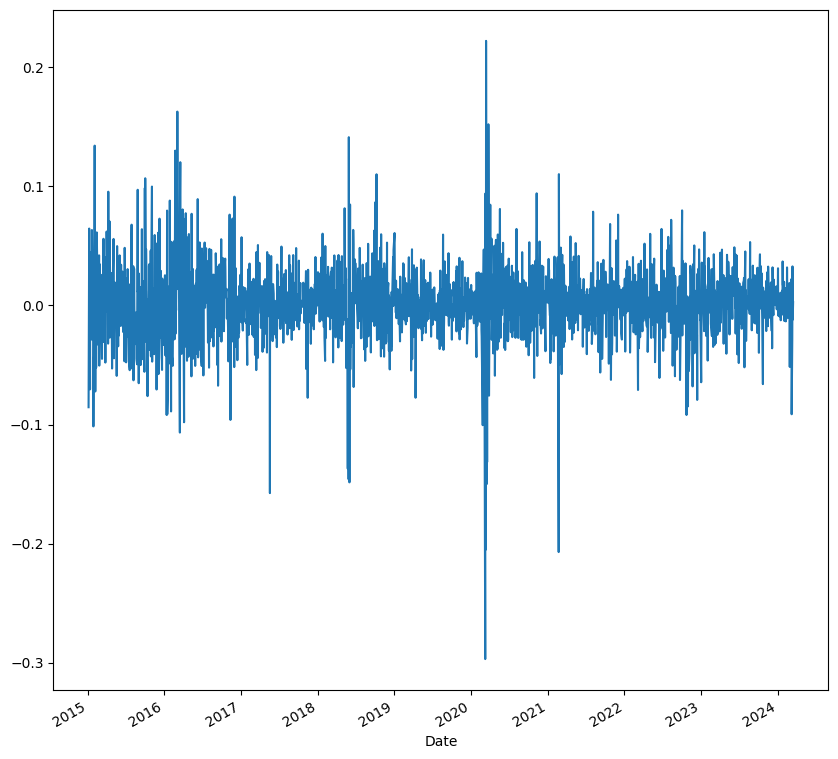

In [29]:
PETR4['TRS'].plot(figsize =(10,10))


In [32]:
retornoD =PETR4['TRS'].mean()

retornoD

0.0015147826401918196

In [33]:
retornoA =PETR4['TRS'].mean()*250

retornoA

0.3786956600479549

In [34]:
print(str(round(retornoA, 4)*100)+'%')

37.87%


# Taxa de Retorno Logaritmico


<Axes: xlabel='Date'>

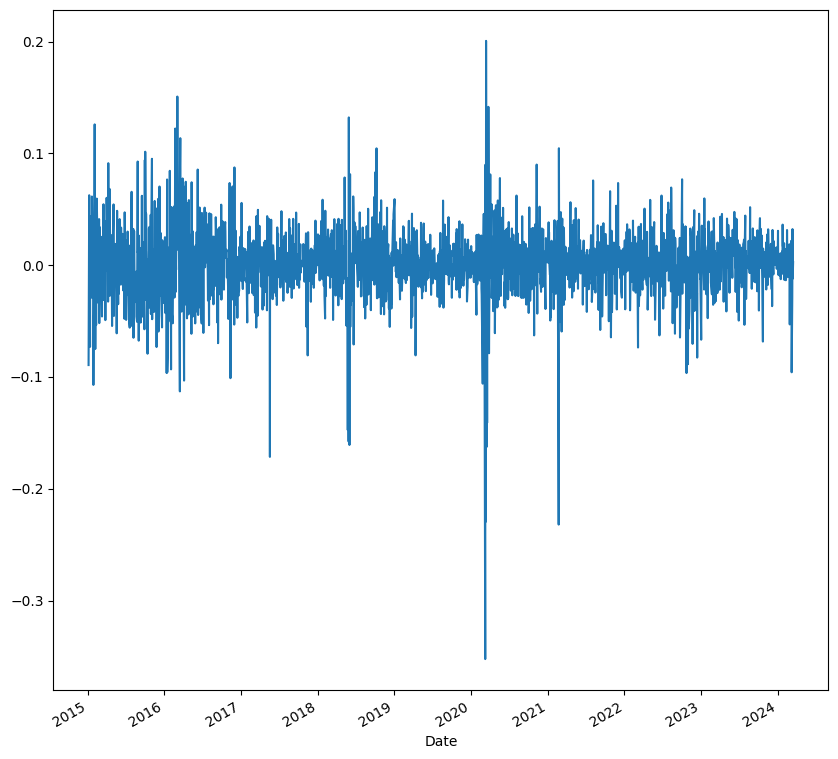

In [35]:
PETR4['TRL'] =np.log(PETR4['Adj Close']/PETR4['Adj Close'].shift(1))

PETR4['TRL'].plot(figsize =(10,10))

In [36]:
retornoLD =PETR4['TRL'].mean()

retornoLA =PETR4['TRL'].mean()*250

In [37]:
print(str(round(retornoLA, 4)*100)+'%')

25.85%


---------------------------------------

# Taxa de Retorno da Carteira na pratica

In [39]:
tickers =['PETR4.SA', 'BBDC4.SA', 'OIBR4.SA', 'AMAR3.SA', 'GOLL4.SA']

dados =pd.DataFrame()

for t in tickers:
    dados[t] =wb.get_data_yahoo(t, start='2015-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [42]:
# ProfileReport(dados)

dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2288 entries, 2015-01-02 to 2024-03-15
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  2288 non-null   float64
 1   BBDC4.SA  2288 non-null   float64
 2   OIBR4.SA  2288 non-null   float64
 3   AMAR3.SA  2288 non-null   float64
 4   GOLL4.SA  2288 non-null   float64
dtypes: float64(5)
memory usage: 107.2 KB


# Normalização para base 100

In [44]:

dados.iloc[0]



PETR4.SA     3.412117
BBDC4.SA     8.736966
OIBR4.SA    84.300003
AMAR3.SA    60.064339
GOLL4.SA    14.990000
Name: 2015-01-02 00:00:00, dtype: float64

<Axes: xlabel='Date'>

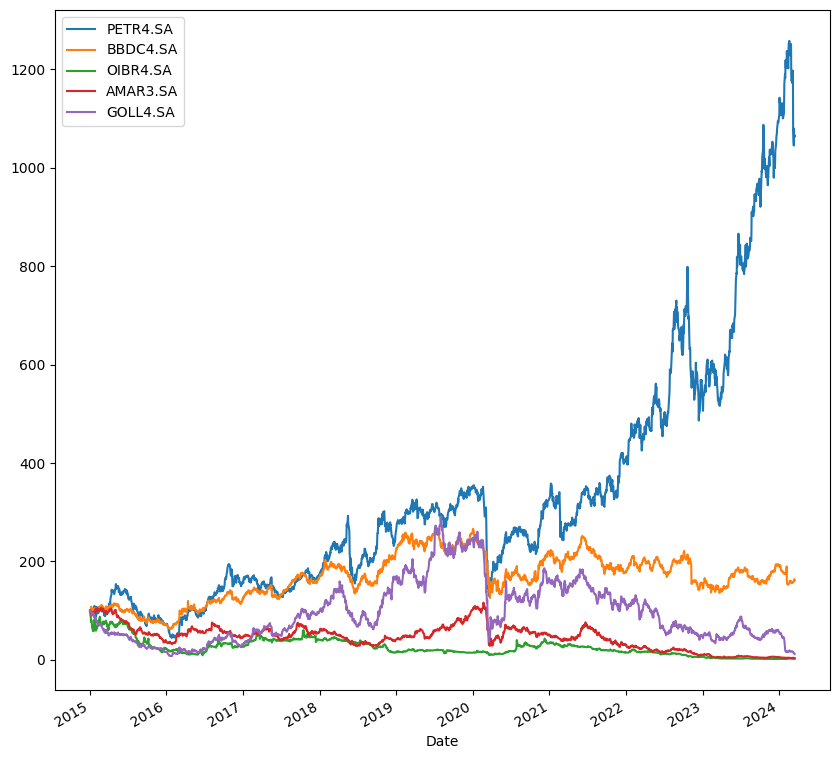

In [45]:
(dados/dados.iloc[0]*100).plot(figsize=(10,10))

# Calculo de retorno da carteira

In [46]:
# taxa de retorno simples dos titulos da carteira


retorno = (dados/dados.shift(1))-1
print(retorno)

            PETR4.SA  BBDC4.SA  OIBR4.SA  AMAR3.SA  GOLL4.SA
Date                                                        
2015-01-02       NaN       NaN       NaN       NaN       NaN
2015-01-05 -0.085470  0.002062 -0.074733 -0.007581 -0.009340
2015-01-06 -0.032710  0.032897 -0.152564 -0.061806  0.024242
2015-01-07  0.047102  0.039741 -0.013616  0.018505 -0.043392
2015-01-08  0.064590  0.005151  0.039877 -0.010901 -0.019244
...              ...       ...       ...       ...       ...
2024-03-11 -0.028610  0.005780 -0.009950 -0.031872 -0.049774
2024-03-12  0.032819  0.012213 -0.020100 -0.008230 -0.033333
2024-03-13 -0.011950  0.010646  0.005128  0.008299 -0.004926
2024-03-14 -0.004398  0.006320 -0.056122 -0.016461  0.000000
2024-03-15  0.002761 -0.015352 -0.010811 -0.054393 -0.118812

[2288 rows x 5 columns]


In [48]:
# Suposição: criar um portifolio igualmente ponderado, criando matriz, nomeaando pesos

pesos =np.array([.20, .20, .20, .20, .20])

# obter retornos anuais de cada uma das ações e calculor o produto escalar desses retornos e pesos

retorno_a =retorno.mean()*250

retorno_a

PETR4.SA    0.378696
BBDC4.SA    0.117790
OIBR4.SA   -0.168145
AMAR3.SA   -0.157162
GOLL4.SA    0.062119
dtype: float64

In [51]:
np.dot(retorno_a, pesos)


# percentual

portifolio =(str(round(np.dot(retorno_a, pesos),5)*100)+'%')
print(portifolio)

4.666%
